# k-Nearest Neighbors (k-NN)

## Training? What's that?


k-NN a *non-parametric, instance-based* learning algorithm. 

This means there's no "weights" to learn. 

Instead, it memorizes the training data and makes predictions by comparing new points to stored examples. 

It finds the **K Nearest points** in the training dataset and uses their class to predict the class or value of a new data point. 

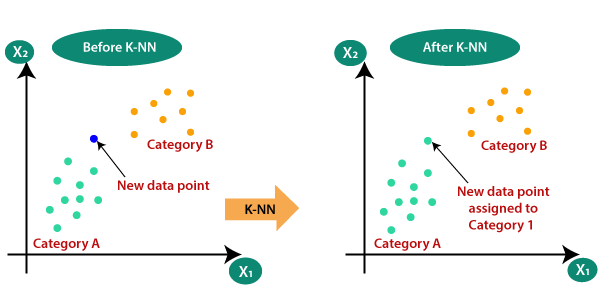

## Classifying/Prediction steps 

1. Compute distance from $x$ to **all training points**
2. Select the **k closest** training points --- these are the "neighbours"
3. Outputting Step

    For **classification**: 
- Output the **majority class** amongst neighbours

    For Regression: 
- Output the **average target value among neighbours**

$$
\hat{y} = \frac{1}{k} \sum_{i \in \text{NN}_k(x)} y^{(i)}
$$


## Distance Metrics 

There are several ways to compute the distance between the input point and the rest of the dataset 
- Euclidean Distance (Most common)
- Manhattan Distance 
- Cosine Similarity

## Why ever use this? 

The entire process of k-NN is simple and interpretable. 

Unfortunately: 

- It is sensitive to irrelevant features and feature scaling
- For large datasets this is also **very** computationally expensive.

## Code Implementation: k-NN Classifier

### Import packages

In [1]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Generate synthetic classification using sklearn

In [4]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

### Split and Scale Dataset

In [5]:
# (No need to validation testing here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define k-NN Class

In [6]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        predictions = []
        for x in X:
            # The euclidean distance can be changed to manhattan or cosine similarity
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

### Train and Evaluate on Synthetic Data

In [7]:
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.82


### Plotting the training data

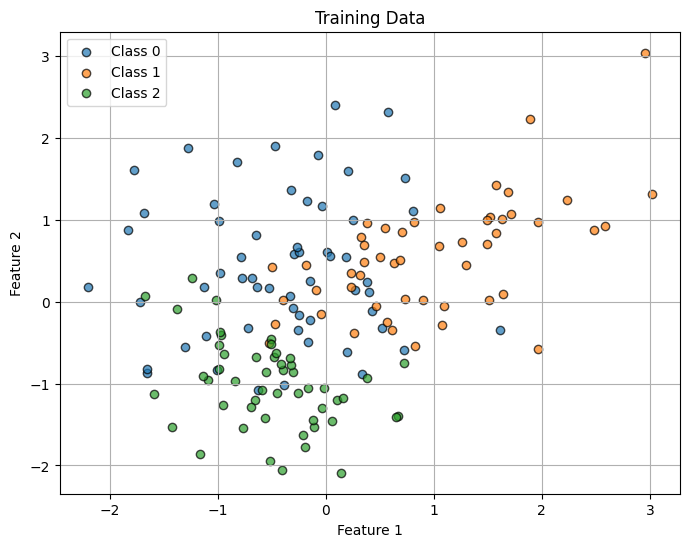

In [8]:
import matplotlib.pyplot as plt

# Visualize training data
plt.figure(figsize=(8, 6))
for class_value in np.unique(y_train):
    plt.scatter(
        X_train[y_train == class_value][:, 0],
        X_train[y_train == class_value][:, 1],
        label=f"Class {class_value}",
        edgecolor="k",
        alpha=0.7
    )
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### Visualizing the Decision Boundary

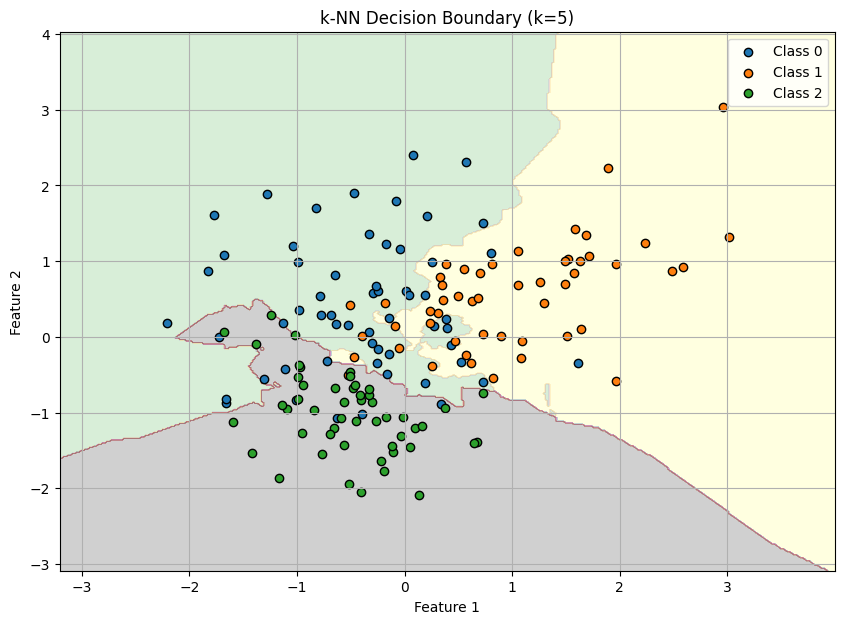

In [10]:
# Create meshgrid
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Flatten grid, predict for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
for class_value in np.unique(y_train):
    plt.scatter(
        X_train[y_train == class_value][:, 0],
        X_train[y_train == class_value][:, 1],
        label=f"Class {class_value}",
        edgecolor="k"
    )
plt.title("k-NN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


This diagram is made by: 

- Going through virtually "all" the possible points in this grid
- Running the k-NN Classifier, with k = 5 and seeing their classes
- Ultimately finding the decision boundaries and categoirizing where points on the grid will fall under. 

## Code Implementation: k-NN Regression

In [11]:
from sklearn.datasets import make_regression

### Create synthetic regression dataset

In [12]:
X, y = make_regression(n_samples=150, n_features=1, noise=20.0, random_state=1)
y = y.reshape(-1)  # ensure y is 1D

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define k-NN Regressor Class

In [13]:
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            predictions.append(np.mean(k_nearest_values))
        return np.array(predictions)

In [14]:
knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [15]:
mse = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse:.2f}")

Test MSE: 511.00


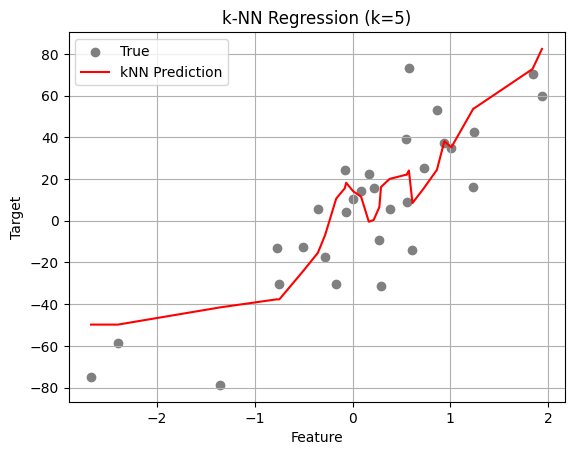

In [16]:
sorted_idx = np.argsort(X_test[:, 0])
plt.scatter(X_test, y_test, label="True", color="gray")
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color="red", label="kNN Prediction")
plt.title("k-NN Regression (k=5)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()
